# Import the Neccesary Libraries #

In [81]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeClassifier, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# import ace_tools as tools
from pprint import pprint
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


In [3]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE



In [4]:
# pip install --upgrade xgboost

In [5]:
# Load the dataset
data = pd.read_csv('/Users/apple/Desktop/DATA SCIENCE PROJECT PREPARARTION /DATA/StudentPerformanceFactors (1).csv')
(data.head(10))


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


# EXPLORATORY DATA ANALYSIS AND DATA PREPROCESSING #

In [7]:
# Check the dimensions (rows, columns) of the dataset
data.shape

(6607, 20)

In [8]:
# Overview of the Dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
print(data.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [11]:
# Separate categorical and numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Printing the number of columns and each column in segments
print('=== NUMERICAL COLUMNS ===')
print(f"Number of numerical columns: {len(numerical_cols)}")
print("Numerical Columns:")
for col in numerical_cols:
    print(f"- {col}")

print('\n')

print('=== CATEGORICAL COLUMNS ===')
print(f"Number of categorical columns: {len(categorical_cols)}")
print("Categorical Columns:")
for col in categorical_cols:
    print(f"- {col}")


=== NUMERICAL COLUMNS ===
Number of numerical columns: 7
Numerical Columns:
- Hours_Studied
- Attendance
- Sleep_Hours
- Previous_Scores
- Tutoring_Sessions
- Physical_Activity
- Exam_Score


=== CATEGORICAL COLUMNS ===
Number of categorical columns: 13
Categorical Columns:
- Parental_Involvement
- Access_to_Resources
- Extracurricular_Activities
- Motivation_Level
- Internet_Access
- Family_Income
- Teacher_Quality
- School_Type
- Peer_Influence
- Learning_Disabilities
- Parental_Education_Level
- Distance_from_Home
- Gender


In [11]:
# Checking for missing Values
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [12]:
# Descriptive Statistical Summary for Numerical column
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [13]:
# Descriptive statistics for categorical columns
data.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [15]:
# Imputation for numerical data (using mean)
num_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

# Imputation for categorical data (using most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

In [17]:
# Checking for missing Values after preprocessing 
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [19]:
# Cap the score at 100
data['Exam_Score'] = data['Exam_Score'].apply(lambda x: min(x, 100))

In [21]:
# The number of duplicate rows in the DataFrame.
data.duplicated().sum()

0

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


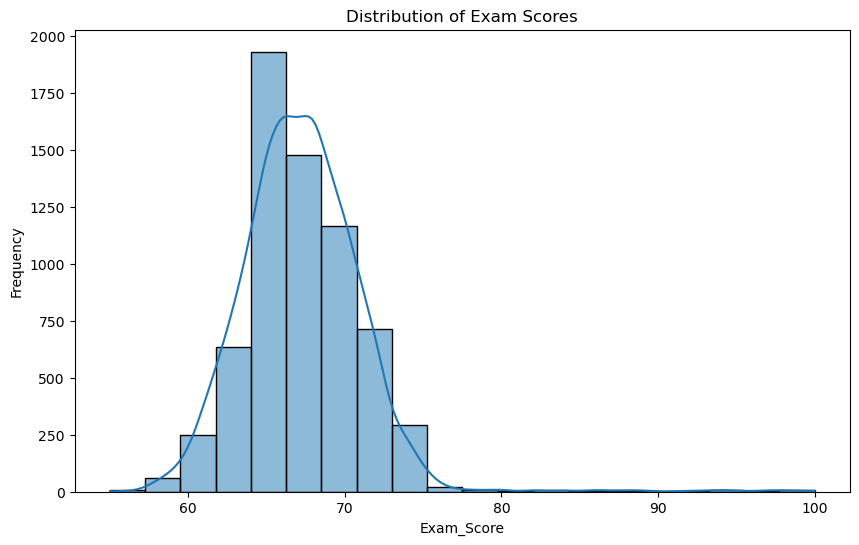

In [23]:
# Plotting the distribution of Exam Score
plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], kde=True, bins=20)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam_Score')
plt.ylabel('Frequency')
plt.show()


In [25]:
# Rename the 'Exam_Score' column to 'Grade'
data.rename(columns={'Exam_Score': 'Grade'}, inplace=True)

# Display the updated DataFrame
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Grade
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,19.0,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,High,Medium,No,7.0,76.0,Medium,Yes,1.0,High,Medium,Public,Positive,2.0,No,High School,Near,Female,68.0
6603,23.0,76.0,High,Medium,No,8.0,81.0,Medium,Yes,3.0,Low,High,Public,Positive,2.0,No,High School,Near,Female,69.0
6604,20.0,90.0,Medium,Low,Yes,6.0,65.0,Low,Yes,3.0,Low,Medium,Public,Negative,2.0,No,Postgraduate,Near,Female,68.0
6605,10.0,86.0,High,High,Yes,6.0,91.0,High,Yes,2.0,Low,Medium,Private,Positive,3.0,No,High School,Far,Female,68.0


In [27]:
# Replacing the values in 'Grade' with Grade Mapping
grade_mapping = {
    'credit': 0,
    'merit': 1,
    'distinction': 2
}
data['Grade'] = data['Grade'].replace(grade_mapping)
# print(data)

In [31]:
#Transforming categorical variables to numerical variables
# Loop through all columns and encode them
for column in data.columns:
    # If the column type is object or contains fewer unique values (categorical-like)
    if data[column].dtype == 'object' or data[column].nunique() < 10:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        
(data.head(10))

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Grade
0,23.0,84.0,1,0,0,3,73.0,1,1,0,1,2,1,2,3,0,1,2,1,67.0
1,19.0,64.0,1,2,0,4,59.0,1,1,2,2,2,1,0,4,0,0,1,0,61.0
2,24.0,98.0,2,2,1,3,91.0,2,1,2,2,2,1,1,4,0,2,2,1,74.0
3,29.0,89.0,1,2,1,4,98.0,2,1,1,2,2,1,0,4,0,1,1,1,71.0
4,19.0,92.0,2,2,1,2,65.0,2,1,3,2,0,1,1,4,0,0,2,0,70.0
5,19.0,88.0,2,2,1,4,89.0,2,1,3,2,2,1,2,3,0,2,2,1,71.0
6,29.0,84.0,2,1,1,3,68.0,1,1,1,1,2,0,1,2,0,1,1,1,67.0
7,25.0,78.0,1,0,1,2,50.0,2,1,1,0,0,1,0,2,0,1,0,1,66.0
8,17.0,94.0,2,0,0,2,80.0,0,1,0,2,1,0,1,1,0,0,2,1,69.0
9,23.0,98.0,2,2,1,4,71.0,2,1,0,0,0,1,2,5,0,1,1,1,72.0


In [35]:
# Classify the Exam Scores in Specific Range
def classify_score(x):
    if x < 50:
        return 'fail'
    elif 50 <= x <= 59:
        return 'credit'
    elif 60 <= x <= 69:
        return 'merit'
    else:
        return 'distinction'

data['Grade'] = data['Grade'].apply(classify_score)
data.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Grade
0,23.0,84.0,1,0,0,3,73.0,1,1,0,1,2,1,2,3,0,1,2,1,merit
1,19.0,64.0,1,2,0,4,59.0,1,1,2,2,2,1,0,4,0,0,1,0,merit
2,24.0,98.0,2,2,1,3,91.0,2,1,2,2,2,1,1,4,0,2,2,1,distinction
3,29.0,89.0,1,2,1,4,98.0,2,1,1,2,2,1,0,4,0,1,1,1,distinction
4,19.0,92.0,2,2,1,2,65.0,2,1,3,2,0,1,1,4,0,0,2,0,distinction
5,19.0,88.0,2,2,1,4,89.0,2,1,3,2,2,1,2,3,0,2,2,1,distinction
6,29.0,84.0,2,1,1,3,68.0,1,1,1,1,2,0,1,2,0,1,1,1,merit
7,25.0,78.0,1,0,1,2,50.0,2,1,1,0,0,1,0,2,0,1,0,1,merit
8,17.0,94.0,2,0,0,2,80.0,0,1,0,2,1,0,1,1,0,0,2,1,merit
9,23.0,98.0,2,2,1,4,71.0,2,1,0,0,0,1,2,5,0,1,1,1,distinction


In [37]:
# Replacing the values in 'Grade' with Grade Mapping
grade_mapping = {
    'credit': 0,
    'merit': 1,
    'distinction': 2
}
data['Grade'] = data['Grade'].replace(grade_mapping)

In [47]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Grade
0,23.0,84.0,1,0,0,3,73.0,1,1,0,1,2,1,2,3,0,1,2,1,1
1,19.0,64.0,1,2,0,4,59.0,1,1,2,2,2,1,0,4,0,0,1,0,1
2,24.0,98.0,2,2,1,3,91.0,2,1,2,2,2,1,1,4,0,2,2,1,2
3,29.0,89.0,1,2,1,4,98.0,2,1,1,2,2,1,0,4,0,1,1,1,2
4,19.0,92.0,2,2,1,2,65.0,2,1,3,2,0,1,1,4,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,0,2,0,3,76.0,2,1,1,0,2,1,2,2,0,1,2,0,1
6603,23.0,76.0,0,2,0,4,81.0,2,1,3,1,0,1,2,2,0,1,2,0,1
6604,20.0,90.0,2,1,1,2,65.0,1,1,3,1,2,1,0,2,0,2,2,0,1
6605,10.0,86.0,0,0,1,2,91.0,0,1,2,1,2,0,2,3,0,1,0,0,1


In [57]:
# Separate features and target
X = data.drop('Grade', axis=1)
y = data['Grade']

In [59]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23.0,84.0,1,0,0,3,73.0,1,1,0,1,2,1,2,3,0,1,2,1
1,19.0,64.0,1,2,0,4,59.0,1,1,2,2,2,1,0,4,0,0,1,0
2,24.0,98.0,2,2,1,3,91.0,2,1,2,2,2,1,1,4,0,2,2,1
3,29.0,89.0,1,2,1,4,98.0,2,1,1,2,2,1,0,4,0,1,1,1
4,19.0,92.0,2,2,1,2,65.0,2,1,3,2,0,1,1,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,0,2,0,3,76.0,2,1,1,0,2,1,2,2,0,1,2,0
6603,23.0,76.0,0,2,0,4,81.0,2,1,3,1,0,1,2,2,0,1,2,0
6604,20.0,90.0,2,1,1,2,65.0,1,1,3,1,2,1,0,2,0,2,2,0
6605,10.0,86.0,0,0,1,2,91.0,0,1,2,1,2,0,2,3,0,1,0,0


In [61]:
y

0       1
1       1
2       2
3       2
4       2
       ..
6602    1
6603    1
6604    1
6605    1
6606    1
Name: Grade, Length: 6607, dtype: int64

In [63]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [77]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.fit_transform(X_test)

In [85]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)

# Define the stacking ensemble with Logistic Regression as the meta-learner
base_models = [('xgb', xgb), ('rf', rf), ('svm', svm)]
stacking_ensemble = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking ensemble
stacking_ensemble.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_stacking = stacking_ensemble.predict(X_test)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Stacking Ensemble Accuracy: {accuracy_stacking:.4f}')

Stacking Ensemble Accuracy: 0.8669


In [96]:
new_X = data[['Attendance',
 'Hours_Studied',
 'Previous_Scores',
 'Motivation_Level',
 'Access_to_Resources',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Distance_from_Home',
 'Family_Income',
 'Sleep_Hours']]
new_y = data['Grade']

In [97]:
new_y

0       1
1       1
2       2
3       2
4       2
       ..
6602    1
6603    1
6604    1
6605    1
6606    1
Name: Grade, Length: 6607, dtype: int64

In [98]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [99]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [100]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.fit_transform(X_test)

In [108]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)

# Define the stacking ensemble with Logistic Regression as the meta-learner
base_models = [('xgb', xgb), ('rf', rf), ('svm', svm)]
stacking_ensemble_10 = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking ensemble
stacking_ensemble_10.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_stacking = stacking_ensemble.predict(X_test)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Stacking Ensemble Accuracy: {accuracy_stacking:.4f}')

Stacking Ensemble Accuracy: 0.8646


In [112]:
stacking_ensemble_10.predict([[1,3,43,4,22,2,4,2,3,4]])

array([2])

In [116]:
import pickle
# Save the model using pickle
with open('stacking_ensemble_model.pkl', 'wb') as file:
    pickle.dump(stacking_ensemble, file)

In [114]:
# Assuming you have trained your models and meta-model

import os
import joblib  # Assuming scikit-learn < 0.24

# Specify the directory path (modify if needed)
directory = "/Users/apple/Desktop/DATA SCIENCE PROJECT PREPARARTION /DATA/"

# Create the directory if it doesn't exist (avoids errors)
os.makedirs(directory, exist_ok=True)

# Save base models (modify filenames as needed)
#joblib.dump(rf_model, os.path.join(directory, "rf_model.pkl"))
#joblib.dump(xgb_model, os.path.join(directory, "xgb_model.pkl"))
#joblib.dump(et_model, os.path.join(directory, "et_model.pkl"))

# Save meta-model
if joblib.dump(stacking_ensemble_10, os.path.join(directory, "stack.pkl")):  # Assuming meta-model is trained
    print("Ensemble Model components saved successfully!")

Ensemble Model components saved successfully!
